<a href="https://colab.research.google.com/github/Tosindare/Machine-Learning-Projects/blob/master/House_Price_Prediction_in_Washington_DC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction: House prices in Washington DC**

**Objective** : To predict house prices based on sales data from May, 2014 to May, 2015

* Dataset includes house sale prices for King County in USA. 
* Homes that are sold in the time period: May, 2014 and May, 2015.
* Data Source: https://www.kaggle.com/harlfoxem/housesalesprediction

* Columns:

> 1. ida: notation for a house
2. date: Date house was sold
3. price: Price is prediction target
4. bedrooms: Number of Bedrooms/House
5. bathrooms: Number of bathrooms/House
6. sqft_living: square footage of the home
7. sqft_lot: square footage of the lot
8. floors: Total floors (levels) in house
9. waterfront: House which has a view to a waterfront
10. view: Has been viewed
11. condition: How good the condition is ( Overall )
12. grade: overall grade given to the housing unit, based on King County grading system
13. sqft_abovesquare: footage of house apart from basement
14. sqft_basement: square footage of the basement
15. yr_built: Built Year
16. yr_renovated: Year when house was renovated
17. zipcode: zip
18. lat: Latitude coordinate
19. long: Longitude coordinate
20. sqft_living15: Living room area in 2015(implies-- some renovations) 
21. sqft_lot15: lotSize area in 2015(implies-- some renovations)


# **Import Libraries and Dataset**

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
house_sales = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/kc_house_data.csv', encoding = 'ISO-8859-1')

In [4]:
house_sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
house_sales.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# **Data Cleanup and Visualization**

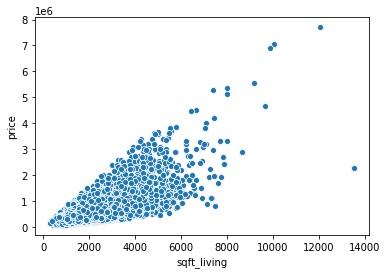

In [6]:
sns.scatterplot(x='sqft_living', y='price', data = house_sales )

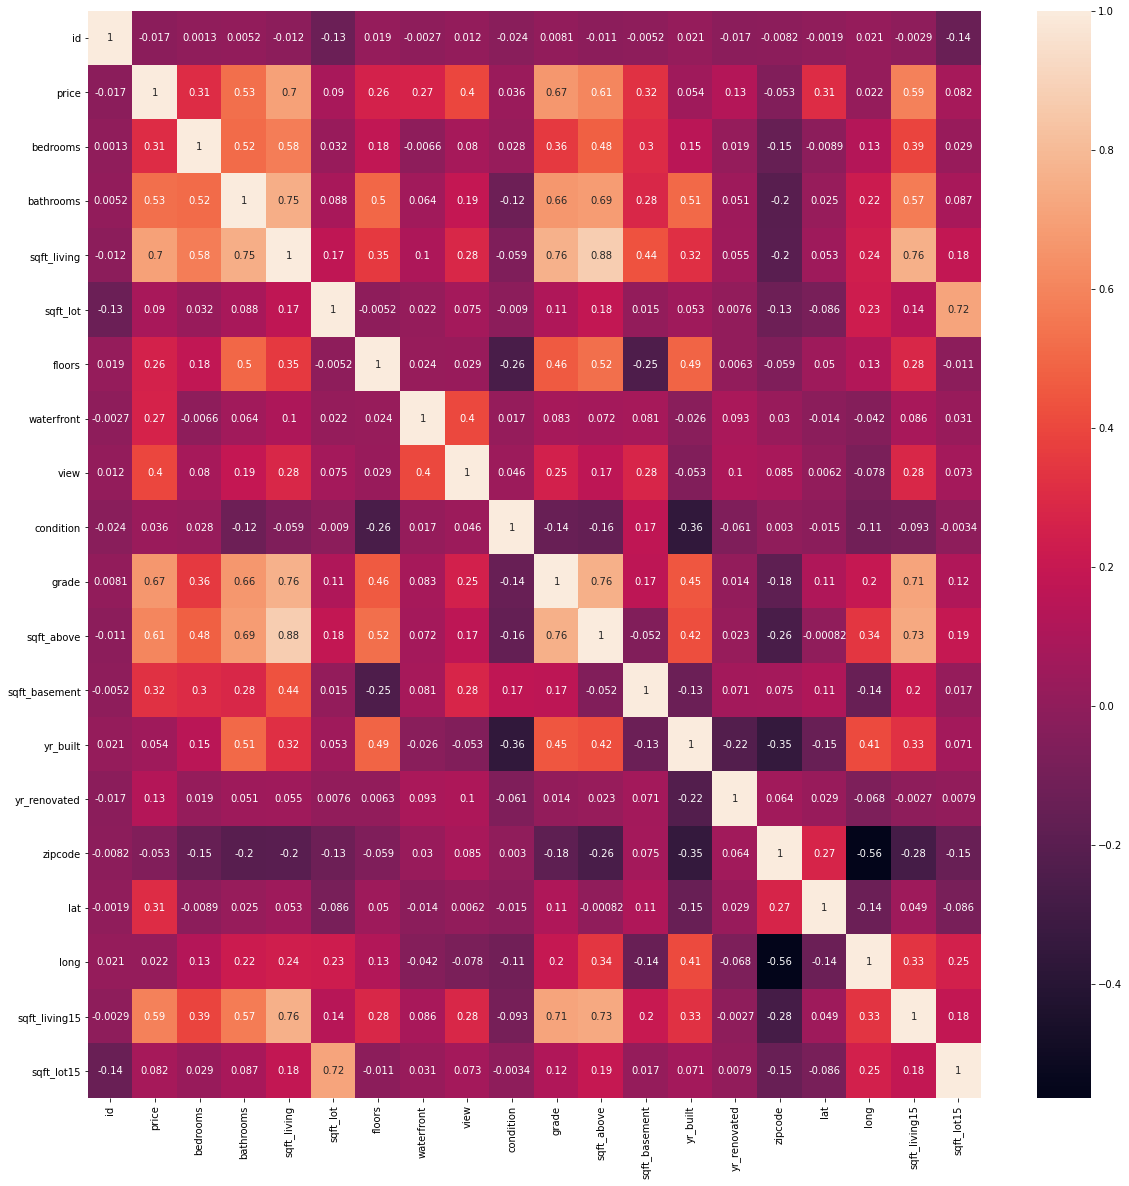

In [7]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(house_sales.corr(), annot = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f71e8c414e0>,
      dtype=object)

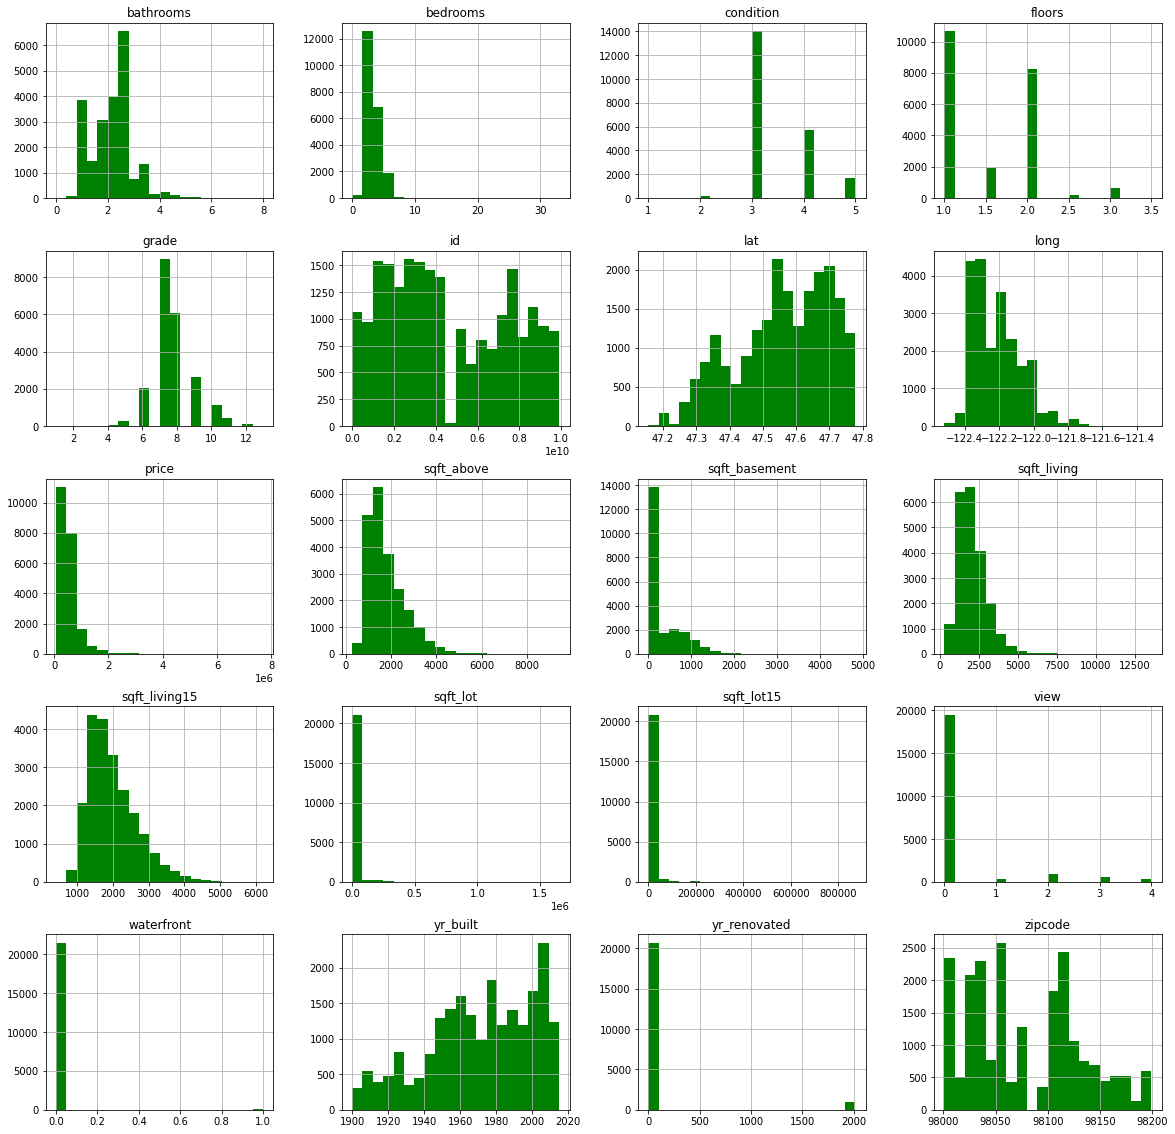

In [8]:
house_sales.hist(bins=20, figsize = (20,20), color = 'g')

In [10]:
#Data Cleaning 
y = house_sales['price']
y


0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [11]:
y.shape

(21613,)

In [12]:
x = house_sales[['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']]
x

,bathrooms,bedrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,1.00,3,1180,5650,1.0,1180,0
1,2.25,3,2570,7242,2.0,2170,400
2,1.00,2,770,10000,1.0,770,0
3,3.00,4,1960,5000,1.0,1050,910
4,2.00,3,1680,8080,1.0,1680,0
...,...,...,...,...,...,...,...
21608,2.50,3,1530,1131,3.0,1530,0
21609,2.50,4,2310,5813,2.0,2310,0
21610,0.75,2,1020,1350,2.0,1020,0
21611,2.50,3,1600,2388,2.0,1600,0


In [13]:
x.shape

(21613, 7)

In [14]:
#Normalise the output 'y'

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)

In [15]:
scaler.data_max_

array([8.000000e+00, 3.300000e+01, 1.354000e+04, 1.651359e+06,
       3.500000e+00, 9.410000e+03, 4.820000e+03])

In [16]:
X_scaled.shape

(21613, 7)

In [17]:
y=y.values.reshape(-1,1)

In [18]:
Y_scaled = scaler.fit_transform(y)

In [19]:
Y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

# **Split Data to Train and Test** 

In [33]:
 from sklearn.model_selection import train_test_split
 X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size = 0.25)
 

In [34]:
X_train.shape, X_test.shape

((16209, 7), (5404, 7))

In [58]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(7, )))
model.add(tf.keras.layers.Dense(units=200, activation='relu'))
model.add(tf.keras.layers.Dense(units=200, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [59]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 100)               800       
_________________________________________________________________
dense_17 (Dense)             (None, 200)               20200     
_________________________________________________________________
dense_18 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 201       
Total params: 61,401
Trainable params: 61,401
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [61]:
epochs_hist = model.fit(X_train, Y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Epoch 1/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0012 - val_loss: 9.7724e-04
Epoch 2/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0011 - val_loss: 9.6151e-04
Epoch 3/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 4/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0011 - val_loss: 9.1835e-04
Epoch 5/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 9.4098e-04
Epoch 6/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 9.4381e-04
Epoch 7/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 9.0638e-04
Epoch 8/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 9.6997e-04
Epoch 9/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 9.9012e-04
Epoch 10/100
260/260 [==============================] - 1s 

#**Evaluate the Model**

In [62]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

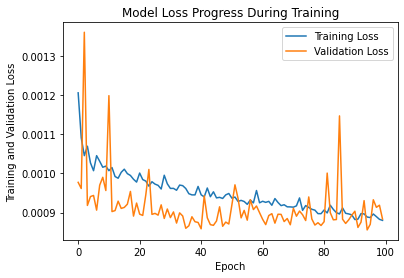

In [63]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

In [64]:
# Try predict using iputs values
# 'bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement'
X_test_1 = np.array([[ 4, 3, 1960, 5000, 1, 2000, 3000 ]])

scaler_1 = MinMaxScaler()
X_test_scaled_1 = scaler_1.fit_transform(X_test_1)

y_predict_1 = model.predict(X_test_scaled_1)

y_predict_1 = scaler.inverse_transform(y_predict_1)
y_predict_1

array([[186002.89]], dtype=float32)

Text(0, 0.5, 'True Values')

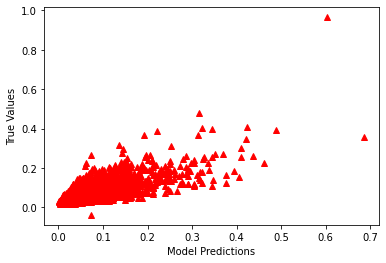

In [65]:
# 
y_predict = model.predict(X_test)
plt.plot(Y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [66]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(Y_test)

(0.0, 3000000.0)

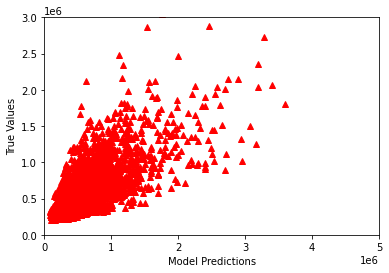

In [67]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)


In [68]:
k = X_test.shape[1]
n = len(X_test)
n

5404

In [69]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 242372.794 
MSE = 58744571118.500465 
MAE = 159475.97583676444 
R2 = 0.5647398650630677 
Adjusted R2 = 0.5641752207071451


# **Try a wider range of inputs**

In [70]:
X= house_sales[['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [71]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,1180,0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,2170,400,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,770,0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,1050,910,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,1680,0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,1530,0,0,0,3,8,1530,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,2310,0,0,0,3,8,2310,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,1020,0,0,0,3,7,1020,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,1600,0,0,0,3,8,1600,2004,0,98027,47.5345,-122.069,1410,1287


In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [74]:
Y= house_sales['price']


In [75]:
Y = y.values.reshape(-1,1)
Y_scaled = scaler.fit_transform(Y)

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, test_size = 0.25)

In [86]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(19, )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=50, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [87]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [88]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Epoch 1/100
260/260 [==============================] - 1s 2ms/step - loss: 9.6739e-04 - val_loss: 5.0589e-04
Epoch 2/100
260/260 [==============================] - 1s 2ms/step - loss: 5.4686e-04 - val_loss: 4.0545e-04
Epoch 3/100
260/260 [==============================] - 1s 2ms/step - loss: 4.7315e-04 - val_loss: 4.0136e-04
Epoch 4/100
260/260 [==============================] - 1s 2ms/step - loss: 4.3822e-04 - val_loss: 3.6603e-04
Epoch 5/100
260/260 [==============================] - 1s 2ms/step - loss: 4.0948e-04 - val_loss: 3.7473e-04
Epoch 6/100
260/260 [==============================] - 0s 2ms/step - loss: 3.8773e-04 - val_loss: 3.8490e-04
Epoch 7/100
260/260 [==============================] - 1s 2ms/step - loss: 3.6766e-04 - val_loss: 3.5633e-04
Epoch 8/100
260/260 [==============================] - 0s 2ms/step - loss: 3.5098e-04 - val_loss: 3.6011e-04
Epoch 9/100
260/260 [==============================] - 1s 2ms/step - loss: 3.4628e-04 - val_loss: 3.4190e-04
Epoch 10/100
260/26

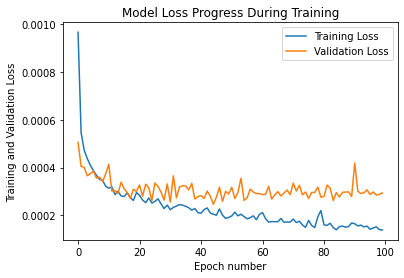

In [89]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss', 'Validation Loss'])

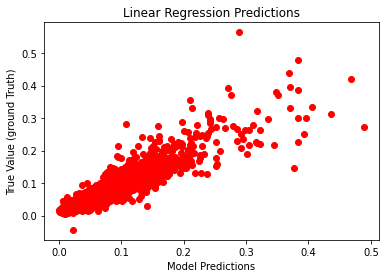

In [90]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "o", color = 'r')
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [91]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)


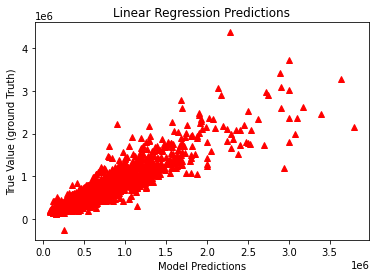

In [92]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [93]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 130173.155 
MSE = 16945050332.53912 
MAE = 75096.88355558383 
R2 = 0.851060217799988 
Adjusted R2 = 0.8508670045910554


**Good model with 85% accuracy to predict house prices from historical data.**